In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:10<00:00, 162MB/s]
100% 1.06G/1.06G [00:10<00:00, 108MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam

In [ ]:
conv_base = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model  = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_base.trainable  = False

In [ ]:
training_ds = keras.utils.image_dataset_from_directory(
    directory=r'/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150, 150),
    shuffle=True
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=r'/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150, 150),
    shuffle=True
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def Normalizaion(image,label):
    image  = tf.cast(image/255.,tf.float32)
    return image,label

training_ds = training_ds.map(Normalizaion)
validation_ds  = validation_ds.map(Normalizaion)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001) ,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model
history = model.fit(
    training_ds,
    epochs=10,
    validation_data=validation_ds
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 86ms/step - accuracy: 0.8400 - loss: 0.3819 - val_accuracy: 0.9084 - val_loss: 0.2183
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.9133 - loss: 0.2013 - val_accuracy: 0.9106 - val_loss: 0.2102
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 102ms/step - accuracy: 0.9263 - loss: 0.1733 - val_accuracy: 0.9122 - val_loss: 0.2162
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 90ms/step - accuracy: 0.9379 - loss: 0.1572 - val_accuracy: 0.9138 - val_loss: 0.2218
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 104ms/step - accuracy: 0.9502 - loss: 0.1251 - val_accuracy: 0.9144 - val_loss: 0.2312
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 89ms/step - accuracy: 0.9565 - loss: 0.1069 - val_accuracy: 0.9088 - val_loss: 0.2626
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.9719 - loss: 0.0758 - val_accuracy: 0.9118 - val_loss: 0.2859
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.9766 - loss: 0.0621 

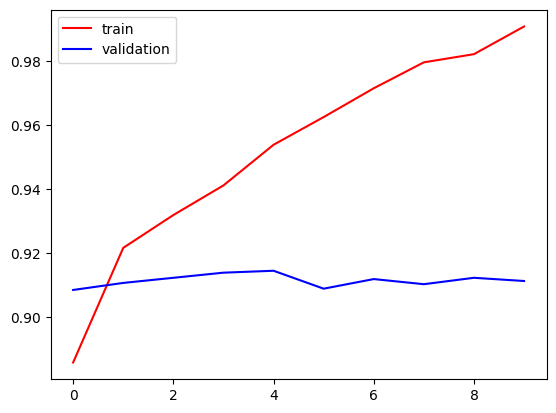

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

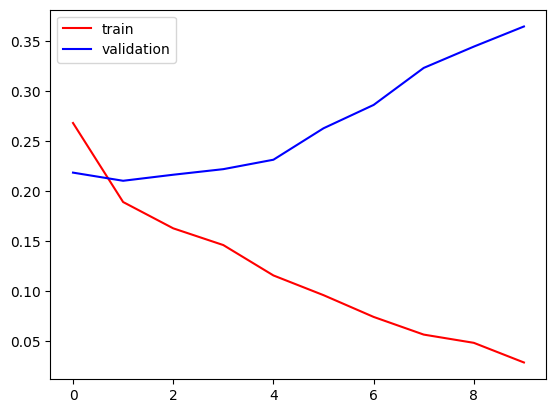

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# DATA AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 242ms/step - accuracy: 0.9095 - loss: 0.2468 - val_accuracy: 0.9076 - val_loss: 0.2295
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 244ms/step - accuracy: 0.9220 - loss: 0.1838 - val_accuracy: 0.9126 - val_loss: 0.2087
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 152s 241ms/step - accuracy: 0.9307 - loss: 0.1672 - val_accuracy: 0.9194 - val_loss: 0.2008
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 243ms/step - accuracy: 0.9328 - loss: 0.1641 - val_accuracy: 0.9172 - val_loss: 0.2133
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 242ms/step - accuracy: 0.9387 - loss: 0.1540 - val_accuracy: 0.9210 - val_loss: 0.1994
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 241ms/step - accuracy: 0.9382 - loss: 0.1482 - val_accuracy: 0.9164 - val_loss: 0.2080
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 243ms/step - accuracy: 0.9435 - loss: 0.1387 - val_accuracy: 0.9182 - val_loss: 0.1983
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 242ms/step - accuracy: 0.9457 - loss: 0.13

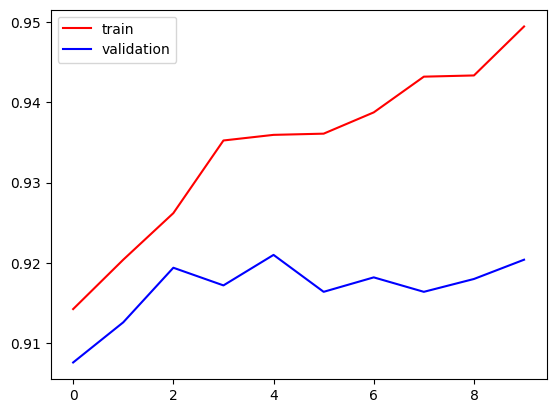

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

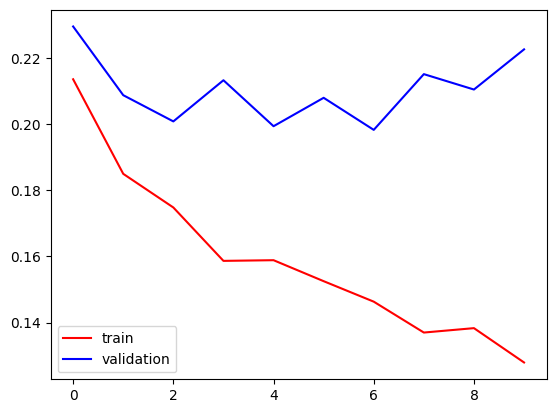

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()